In [3]:
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
# Ruta de la carpeta que contiene los archivos CSV
data_folder = 'Utils/Data_Origen'


In [ ]:
# Leer el archivo Excel
df_excel = pd.read_excel("Data/consumohdna_202408.xlsx")

#convertimos en conjunto de datos y guardamos en la carpeta Data
df_excel.to_csv("Data/consumohdna_202408.csv", index=False)

In [4]:
# Obtener la lista de archivos CSV en la carpeta
csv_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]
csv_files = sorted(csv_files)  # Ordenar la lista de archivos

for file in csv_files:
    print(file)

Utils/Data_Origen\consumohdna_202211.csv
Utils/Data_Origen\consumohdna_202212.csv
Utils/Data_Origen\consumohdna_202301.csv
Utils/Data_Origen\consumohdna_202302.csv
Utils/Data_Origen\consumohdna_202303.csv
Utils/Data_Origen\consumohdna_202304.csv
Utils/Data_Origen\consumohdna_202305.csv
Utils/Data_Origen\consumohdna_202306.csv
Utils/Data_Origen\consumohdna_202307.csv
Utils/Data_Origen\consumohdna_202308.csv
Utils/Data_Origen\consumohdna_202309.csv
Utils/Data_Origen\consumohdna_202310.csv
Utils/Data_Origen\consumohdna_202311.csv
Utils/Data_Origen\consumohdna_202312.csv
Utils/Data_Origen\consumohdna_202401.csv
Utils/Data_Origen\consumohdna_202402.csv
Utils/Data_Origen\consumohdna_202403.csv
Utils/Data_Origen\consumohdna_202404.csv
Utils/Data_Origen\consumohdna_202405.csv
Utils/Data_Origen\consumohdna_202406.csv
Utils/Data_Origen\consumohdna_202407.csv
Utils/Data_Origen\consumohdna_202408.csv
Utils/Data_Origen\consumohdna_202409.csv
Utils/Data_Origen\consumohdna_202410.csv
Utils/Data_Orige

In [18]:
df_corregir1 = pd.read_csv("Data/consumohdna_202211.csv", encoding='latin-1', sep=';', dtype=str)

df_corregir1["PERIODO"] = '202211'

df_corregir1.head()

df_corregir1.to_csv("Data/consumohdna_202211.csv", index=False)

In [5]:
# Función para leer un archivo CSV con la codificación y delimitador detectados
def read_csv_with_detected_encoding_and_delimiter(file_path):
    encodings = ['utf-8-sig','latin-1', 'utf-8']
    delimiters = [';',',']
    
    for encoding in encodings:
        print("\n")
        print(f"Intentando leer el archivo {file_path} con codificación: {encoding}")
        for delimiter in delimiters:
            try:
                df = pd.read_csv(file_path, encoding=encoding, sep=delimiter, dtype=str)
                print(f"Archivo leído correctamente con codificación: {encoding} y delimitador: {delimiter}")
                return df
            except Exception as e:
                print(f"Error al leer el archivo con codificación: {encoding} y delimitador: {delimiter}. Error: {e}")
                continue
    raise Exception(f"No se pudo leer el archivo {file_path} con ninguna de las combinaciones de codificación y delimitador probadas.")


In [22]:
# Leer todos los archivos CSV con la codificación y delimitador detectados

output_file = 'data_consumo_unificado.csv'

# Escribe encabezado solo una vez
primero = True

for file in csv_files:
    df_temp = read_csv_with_detected_encoding_and_delimiter(file)

    # Mantener solo las columnas necesarias
    columnas_deseadas = ['PERIODO', 'UNIDAD_NEGOCIO','DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
'IMPORTE', 'CONSUMO']
    print(df_temp['PERIODO'].head( ))
    df_temp = df_temp[columnas_deseadas]

    # Guardar en el archivo destino por partes
    df_temp.to_csv(output_file, mode='a', header=primero, index=False)
    primero = False  # solo el primero tiene encabezado



Intentando leer el archivo Data/consumohdna_202211.csv con codificación: utf-8-sig
Error al leer el archivo con codificación: utf-8-sig y delimitador: ;. Error: Error tokenizing data. C error: Expected 1 fields in line 76099, saw 2

Archivo leído correctamente con codificación: utf-8-sig y delimitador: ,
0    202211
1    202211
2    202211
3    202211
4    202211
Name: PERIODO, dtype: object


Intentando leer el archivo Data/consumohdna_202212.csv con codificación: utf-8-sig
Error al leer el archivo con codificación: utf-8-sig y delimitador: ;. Error: 'utf-8' codec can't decode byte 0xbf in position 171796: invalid start byte
Error al leer el archivo con codificación: utf-8-sig y delimitador: ,. Error: Error tokenizing data. C error: Expected 1 fields in line 14993, saw 2



Intentando leer el archivo Data/consumohdna_202212.csv con codificación: latin-1
Archivo leído correctamente con codificación: latin-1 y delimitador: ;
0    202212
1    202212
2    202212
3    202212
4    202212


In [ ]:
#Seleccionamos los datos de Ancash

df = pd.read_csv('data_consumo_unificado.csv')

# Filtrar
df_ancash = df[df['DEPARTAMENTO'] == 'Ancash']

# Guardar
df_ancash.to_csv('data_consumo_ancash.csv', index=False)

In [7]:
# Función para escalar a miles
def escalar_miles(df, columnas):
    for col in columnas:
        df[col] = (df[col] / 1000).round(1)
    return df


In [11]:
# Cargar el archivo unificado
df = pd.read_csv('Utils/data_consumo_ancash.csv')

# Asegurarte que PERIODO esté como string o entero limpio
df['PERIODO'] = df['PERIODO'].astype(str).str[:6]

# Agrupar por PERIODO y calcular los valores pedidos
resumen_periodo_ancash = df.groupby('PERIODO').agg(
    CONSUMO_PROMEDIO=('CONSUMO', 'sum'),
    IMPORTE_PROMEDIO=('IMPORTE', 'sum'),
    REGISTROS=('CONSUMO', 'count')  # o 'size'
).reset_index()

resumen_periodo_ancash = escalar_miles(resumen_periodo_ancash,['CONSUMO_PROMEDIO','IMPORTE_PROMEDIO'])

resumen_periodo_ancash.to_csv("Data/Total.csv", index=False)

# Visualizar
print(resumen_periodo_ancash)

   PERIODO  CONSUMO_PROMEDIO  IMPORTE_PROMEDIO  REGISTROS
0   202211           34842.4           32597.2     298054
1   202212           35769.8           34814.2     300171
2   202301           36157.2           35393.6     302425
3   202302           34910.7           32807.9     303837
4   202303           38108.2           34899.6     305229
5   202304           37795.5           34429.8     305997
6   202305           36639.3           33699.4     306027
7   202306           34839.3           31918.6     307934
8   202307           35645.7           32003.1     309218
9   202308           35822.1           31734.2     309957
10  202309           34713.3           30417.6     310748
11  202310           36493.9           31829.9     311584
12  202311           35584.7           30713.9     312296
13  202312           37360.6           32979.8     313566
14  202401           38902.7           33474.3     313970
15  202402           37591.1           32691.2     314226
16  202403    

In [9]:
# Usamos el resumen del paso anterior
df_ts = resumen_periodo_ancash.copy()

# Convertir PERIODO a fecha (formato año-mes)
df_ts['FECHA'] = pd.to_datetime(df_ts['PERIODO'], format='%Y%m')
df_ts.set_index('FECHA', inplace=True)

# Asegurar orden cronológico
df_ts.sort_index(inplace=True)

# Seleccionar solo la variable objetivo
serie = df_ts['CONSUMO_PROMEDIO']

# Visualizar
print(serie.head())

FECHA
2022-11-01    34842.4
2022-12-01    35769.8
2023-01-01    36157.2
2023-02-01    34910.7
2023-03-01    38108.2
Name: CONSUMO_PROMEDIO, dtype: float64


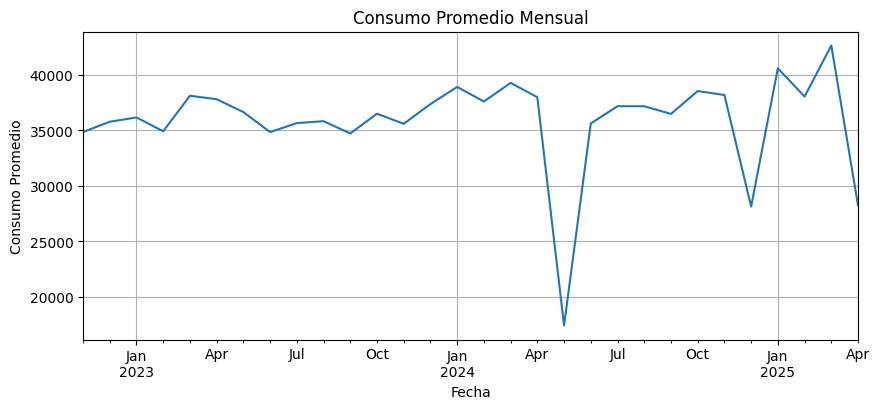

In [10]:
import matplotlib.pyplot as plt

serie.plot(figsize=(10, 4), title='Consumo Promedio Mensual')
plt.xlabel("Fecha")
plt.ylabel("Consumo Promedio")
plt.grid()
plt.show()

f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


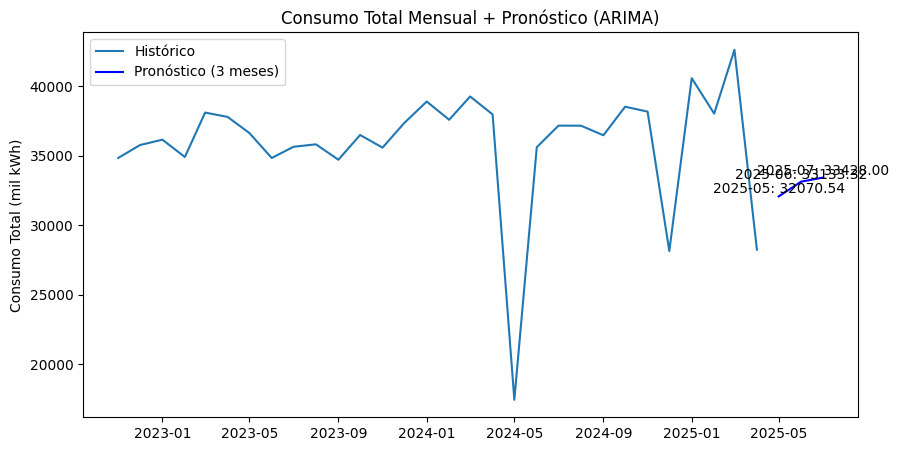

<Figure size 640x480 with 0 Axes>

   Período  Predicción
0  2025-05     32070.5
1  2025-06     33133.3
2  2025-07     33428.0


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(serie, order=(1, 1, 1),freq='MS').fit()
pred = model.forecast(steps=3)
fechas_futuras = pd.date_range(serie.index[-1] + pd.offsets.MonthBegin(1), periods=3, freq='MS')
pred_series = pd.Series(pred, index=fechas_futuras)
y_true = serie[-3:]
y_pred = pred

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(serie, label='Histórico')
ax.plot(pred_series, label='Pronóstico (3 meses)', color='blue')
ax.set_title("Consumo Total Mensual + Pronóstico (ARIMA)")
ax.set_ylabel("Consumo Total (mil kWh)")
ax.legend()
fig = plt.figure()

# Imprimir los 3 meses predichos en un cuadro
for i, (fecha, valor) in enumerate(zip(pred_series.index, pred_series.values)):
    ax.text(fecha, valor, f"{fecha.strftime('%Y-%m')}: {valor:.2f}", ha='center', va='bottom')

plt.show()

# Crear un DataFrame con el período y la predicción
pred_df = pd.DataFrame({'Período': pred_series.index.strftime('%Y-%m'), 'Predicción': pred_series.values.round(1)})

# Imprimir el DataFrame
print(pred_df)

In [26]:
# Metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

# Mostrar resultados
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MSE: 50900070.53782918
MAE: 6883.945274507906
RMSE: 7134.428536177876
MAPE: 18.780326976303616


f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklea

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=370.470, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=366.600, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=370.480, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=370.544, Time=0.09 sec


f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,0)[12]             : AIC=364.967, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=368.509, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=368.511, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=368.621, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=368.927, Time=0.03 sec


f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklea

 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=370.501, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 0.723 seconds


f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


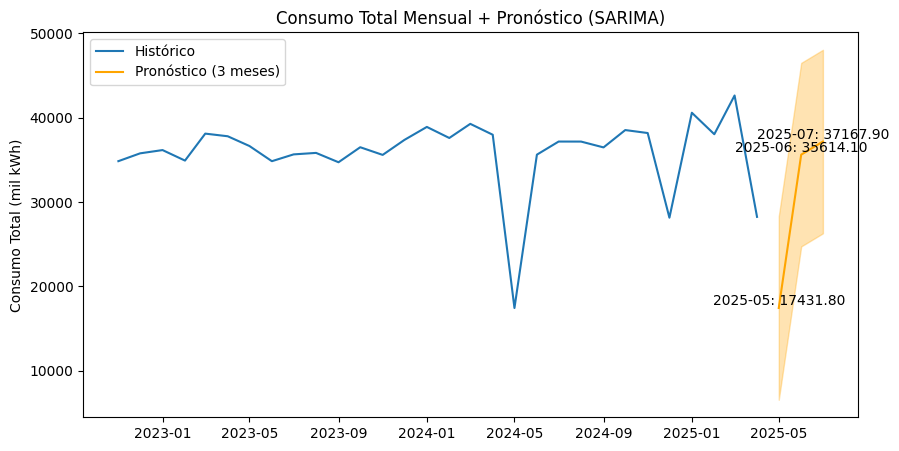

<Figure size 640x480 with 0 Axes>

   Período  Predicción
0  2025-05     17431.8
1  2025-06     35614.1
2  2025-07     37167.9


In [27]:
import pmdarima as pm

modelo_auto = pm.auto_arima(serie, start_p=0, start_q=0, max_p=3, max_q=3, d=None,
                            seasonal=True, m=12, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True, seasonal_test='ch')
forecast, confint = modelo_auto.predict(n_periods=3, return_conf_int=True)
fechas_futuras = pd.date_range(serie.index[-1] + pd.offsets.MonthBegin(1), periods=3, freq='MS')
pred_series = pd.Series(forecast, index=fechas_futuras)
y_true = serie[-3:]
y_pred = modelo_auto.predict_in_sample()[-3:]


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(serie, label='Histórico')
ax.plot(pred_series, label='Pronóstico (3 meses)', color='orange')
ax.fill_between(fechas_futuras, confint[:, 0], confint[:, 1], color='orange', alpha=0.3)
ax.set_title("Consumo Total Mensual + Pronóstico (SARIMA)")
ax.set_ylabel("Consumo Total (mil kWh)")
ax.legend()
fig = plt.figure()

# Imprimir los 3 meses predichos en un cuadro
for i, (fecha, valor) in enumerate(zip(pred_series.index, pred_series.values)):
    ax.text(fecha, valor, f"{fecha.strftime('%Y-%m')}: {valor:.2f}", ha='center', va='bottom')

plt.show()

# Crear un DataFrame con el período y la predicción
pred_df = pd.DataFrame({'Período': pred_series.index.strftime('%Y-%m'), 'Predicción': pred_series.values.round(1)})

# Imprimir el DataFrame
print(pred_df)

In [28]:
# Metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

# Mostrar resultados
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MSE: 35443218.59666666
MAE: 4515.100000000001
RMSE: 5953.42074749187
MAPE: 14.514327608384953


f:\Tecsup-En-Memoria\Integrador\Integrated-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:50:51 - cmdstanpy - INFO - Chain [1] start processing
15:50:52 - cmdstanpy - INFO - Chain [1] done processing


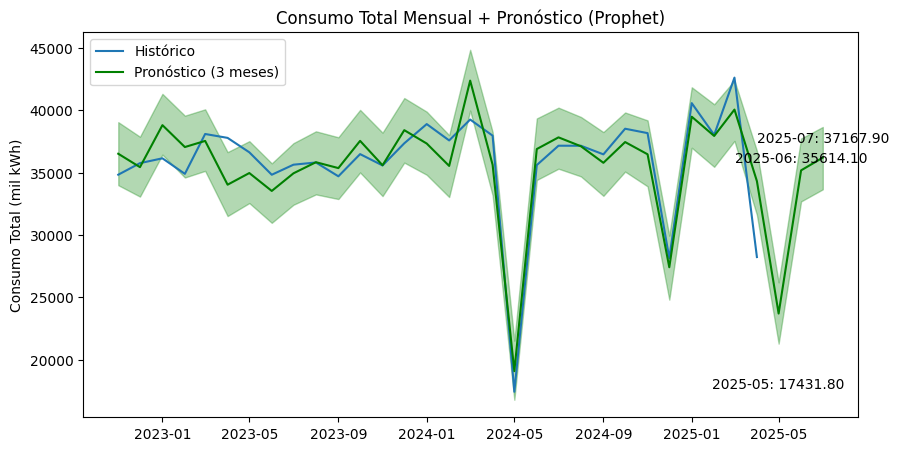

<Figure size 640x480 with 0 Axes>

   Período  Predicción
0  2025-05     17431.8
1  2025-06     35614.1
2  2025-07     37167.9


In [29]:
from prophet import Prophet

df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=3, freq='MS')
forecast = model.predict(future)

y_true = df_prophet['y'][-3:]
y_pred = model.predict(df_prophet.tail(3))['yhat']


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_prophet['ds'], df_prophet['y'], label='Histórico')
ax.plot(forecast['ds'], forecast['yhat'], label='Pronóstico (3 meses)', color='green')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.3)
ax.set_title("Consumo Total Mensual + Pronóstico (Prophet)")
ax.set_ylabel("Consumo Total (mil kWh)")
ax.legend()

fig = plt.figure()

# Imprimir los 3 meses predichos en un cuadro
for i, (fecha, valor) in enumerate(zip(pred_series.index, pred_series.values)):
    ax.text(fecha, valor, f"{fecha.strftime('%Y-%m')}: {valor:.2f}", ha='center', va='bottom')

plt.show()

# Crear un DataFrame con el período y la predicción
pred_df = pd.DataFrame({'Período': pred_series.index.strftime('%Y-%m'), 'Predicción': pred_series.values.round(1)})

# Imprimir el DataFrame
print(pred_df)

In [30]:
# Metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

# Mostrar resultados
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MSE: 14552698.889202565
MAE: 2912.8031508125764
RMSE: 3814.799980235211
MAPE: 9.26751451500134


In [35]:
# Creamos los datos para las demas regiones

# Cargar el archivo unificado
df = pd.read_csv('Utils/data_consumo_ancash.csv')
provincias = sorted(df['PROVINCIA'].unique())
# Asegurarte que PERIODO esté como string o entero limpio
df['PERIODO'] = df['PERIODO'].astype(str).str[:6]

for provincia in  provincias:
    df_filtrado = df[df['PROVINCIA'] == provincia]
    # Agrupar por PERIODO y calcular los valores pedidos
    resumen_periodo_provincia = df_filtrado.groupby('PERIODO').agg(
        CONSUMO_PROMEDIO=('CONSUMO', 'sum'),
        IMPORTE_PROMEDIO=('IMPORTE', 'sum'),
        REGISTROS=('CONSUMO', 'count')  # o 'size'
    ).reset_index()

    resumen_periodo_provincia = escalar_miles(resumen_periodo_provincia,['CONSUMO_PROMEDIO','IMPORTE_PROMEDIO'])

    resumen_periodo_provincia.to_csv(f"Data/{provincia}.csv", index=False)

    # Visualizar
    print(provincia,"\n")
    print(resumen_periodo_provincia)
    print("\n")

Aija 

   PERIODO  CONSUMO_PROMEDIO  IMPORTE_PROMEDIO  REGISTROS
0   202211             134.9             108.5       1502
1   202212             127.3             106.2       1503
2   202301             125.8             103.2       1550
3   202302             147.3             110.6       1551
4   202303             172.5             126.1       1564
5   202304             194.0             132.6       1567
6   202305             213.6             140.6       1580
7   202306             222.3             146.4       1582
8   202307             214.9             147.4       1588
9   202308             228.6             144.9       1591
10  202309             226.3             138.7       1593
11  202310             233.5             149.0       1597
12  202311             226.5             149.9       1599
13  202312             190.5             135.9       1600
14  202401             156.9             122.3       1604
15  202402             165.4             125.9       1604
16  202